## Дюкарев Антон Алексеевич
## Рабочая тетрадь №4
## БББО - 03 - 20

### Задание 1.1.1


In [78]:
from numpy import *
from numpy.random import *
delta=1.0
x=linspace(-6,6,13)
y=x**2+delta*(rand(13)-1)
x+=delta*(rand(13)-1)
x.tofile('x_data.txt','\n')
y.tofile('y_data.txt','\n')

4.999999999999998 3.32325934484418e-15


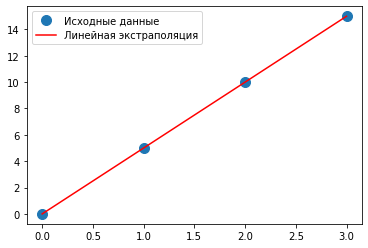

In [32]:
import numpy as np
x=np.array([0,1,2,3])
y=np.array([0,5,10,15])
A=np.vstack([x,np.ones(len(x))]).T
m,c= np.linalg.lstsq(A,y,rcond=None)[0]
print(m,c)
plt.plot(x,y,'o', label='Исходные данные', markersize=10)
plt.plot(x,m*x+c,'r',label='Линейная экстраполяция')
plt.legend()
plt.show()

### Задание 1.1.2

[-6.29341508 -5.20970286 -4.7423113  -3.3344089  -2.03696687 -1.05936067
 -0.69922978  0.0725161   1.35469399  2.86030228  3.48737438  4.56287843
  5.5334177 ]
[ 3.57436522e+01  2.41932817e+01  1.52275669e+01  8.28293525e+00
  3.42371332e+00  6.81321758e-01 -2.27092753e-02  5.85069617e-01
  3.77595631e+00  8.91884150e+00  1.52896432e+01  2.46294085e+01
  3.50061824e+01]


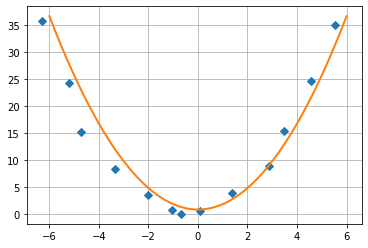

In [79]:
x=fromfile('x_data.txt',float,sep='\n')
y=fromfile('y_data.txt',float,sep='\n')
print(x)
print(y)
m=vstack((x**2,x,ones(13))).T
s=np.linalg.lstsq(m,y,rcond=None)[0]
x_prec=linspace(-6,6,103)
plt.plot(x,y,'D')
plt.plot(x_prec,s[0]*x_prec**2+s[1],'-',lw=2)
plt.grid()
plt.savefig('парабола1.png')

### Задание 1.1.3

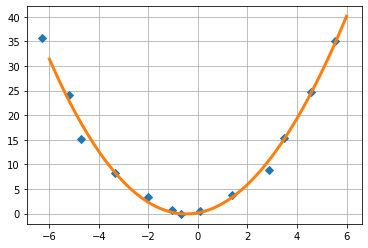

In [80]:
m=vstack((x**3,x**2,x,ones(13))).T
s=np.linalg.lstsq(m,y,rcond=None)[0]
x_prec=linspace(-6,6,103)
plt.plot(x,y,'D')
plt.plot(x_prec,s[0]*x_prec**3+s[1]*x_prec**2+s[2]*x_prec+s[3],'-',lw=3)
plt.grid()
plt.savefig('полином 3-й степени.png')

### Задание 1.1.4


In [104]:
beta=(0.25,0.75,0.5)
def f(x,b0,b1,b2):
    return b0+b1*np.exp(-b2*x**2)
xdata=np.linspace(0,5,50)
y=f(xdata,*beta)
ydata=y+0.05*np.random.randn(len(xdata))

In [105]:
from scipy.optimize import curve_fit
beta_opt, beta_cov=sp.optimize.curve_fit(f,xdata,ydata)
beta_opt

array([0.27142637, 0.7265041 , 0.56450964])

In [106]:
lin_dev=sum(beta_cov[0])
print(lin_dev)
residuals=ydata-f(xdata,*beta_opt)
fres=sum(residuals**2)
print(fres)
print(xdata)
print(ydata)

0.0002342825750138069
0.11288074570900561
[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[0.99524958 0.98111144 0.94095019 0.9584457  0.89131889 0.91976142
 0.87255686 0.86540817 0.87176415 0.70044802 0.70363679 0.63045997
 0.55383244 0.51509311 0.45166176 0.38495296 0.45976243 0.41605944
 0.34118752 0.43447126 0.35075782 0.36371943 0.3479323  0.25301772
 0.23419515 0.34508869 0.28169357 0.3280408  0.27831535 0.20097895
 0.2419232  0.21681821 0.2686541  0.2571971  0.31797734 0.24623

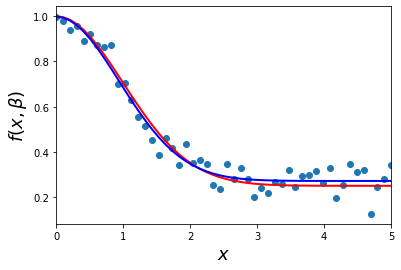

In [112]:
fig,ax=plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$",fontsize=18)
plt.show()

### Задание 1.1.5


[0.2619891  0.74787987]
0.00011136628488621247
0.09792552714438651


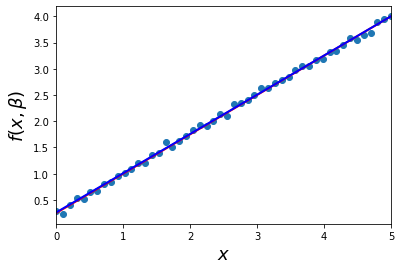

In [19]:
#1
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
beta=(0.25,0.75)
def f(x,b0,b1):
    return b0+x*b1
xdata=np.linspace(0,5,50)
y=f(xdata,*beta)
ydata=y+0.05*np.random.randn(len(xdata))
beta_opt,beta_cov=sp.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)
lin_dev=sum(beta_cov[0])
print(lin_dev)
residuals= ydata-f(xdata,*beta_opt)
fres=sum(residuals**2)
print(fres)
fig,ax=plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x,\beta$)",fontsize=18)
plt.show()

[0.28299808 0.71460081 0.50616687]
0.0001632651494283015
0.13614604177756826


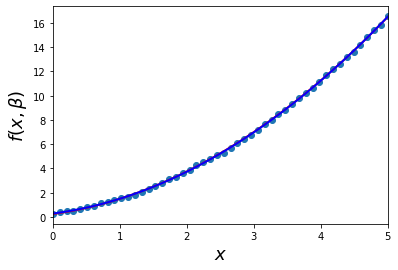

In [20]:
#2
beta=(0.25,0.75,0.5)
def f(x,b0,b1,b2):
    return b0+x*b1+x*x*b2
xdata=np.linspace(0,5,50)
y=f(xdata,*beta)
ydata=y+0.05*np.random.randn(len(xdata))
beta_opt,beta_cov=sp.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)
lin_dev=sum(beta_cov[0])
print(lin_dev)
residuals= ydata-f(xdata,*beta_opt)
fres=sum(residuals**2)
print(fres)
fig,ax=plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x,\beta$)",fontsize=18)
plt.show()

[0.97958638 2.01896568]
4.005082168530733e-05
0.0926151739155853


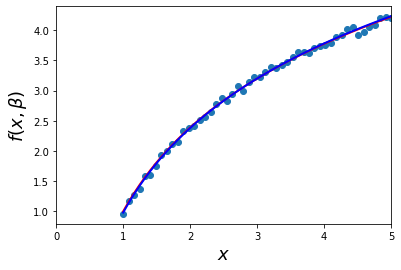

In [30]:
#3
beta=(1,2)
def f(x,b0,b1):
    return b0+b1*np.log(x)
xdata=np.linspace(1,5,50)
y=f(xdata,*beta)
ydata=y+0.05*np.random.randn(len(xdata))
beta_opt,beta_cov=sp.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)
lin_dev=sum(beta_cov[0])
print(lin_dev)
residuals= ydata-f(xdata,*beta_opt)
fres=sum(residuals**2)
print(fres)
fig,ax=plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x,\beta$)",fontsize=18)
plt.show()

[1.00328638 1.99847138]
1.2944761869741494e-06
0.12178221922047934


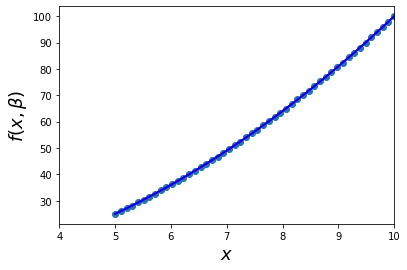

In [39]:
#4
beta=(1,2)
def f(x,b0,b1):
    return b0*x**b1
xdata=np.linspace(5,10,50)
y=f(xdata,*beta)
ydata=y+0.05*np.random.randn(len(xdata))
beta_opt,beta_cov=sp.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)
lin_dev=sum(beta_cov[0])
print(lin_dev)
residuals= ydata-f(xdata,*beta_opt)
fres=sum(residuals**2)
print(fres)
fig,ax=plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(4,10)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x,\beta$)",fontsize=18)
plt.show()


### ### Задание 1.2.1

In [69]:
url='https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
dataframe=pd.read_csv(url)
dataframe.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [67]:
print(dataframe.shape)
dataframe.describe()

(30, 2)


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


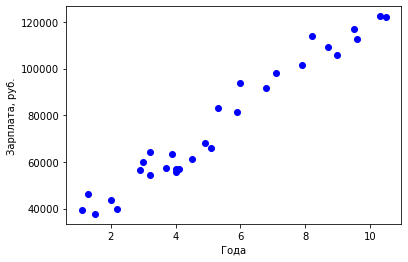

In [72]:
plt.scatter(dataframe['YearsExperience'],dataframe['Salary'], color='b',label="Зарпалата")
plt.xlabel("Года")
plt.ylabel("Зарплата, руб.")
plt.show()

In [73]:
X=dataframe.iloc[:,:-1].values
y=dataframe.iloc[:,1].values
print(X)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [75]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)
print(regressor.intercept_)
print(regressor.coef_)

26780.099150628186
[9312.57512673]


In [76]:
y_pred=regressor.predict(X_test)
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


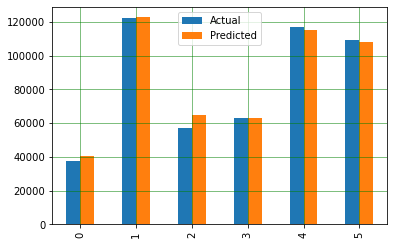

In [78]:
df.plot(kind='bar')
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

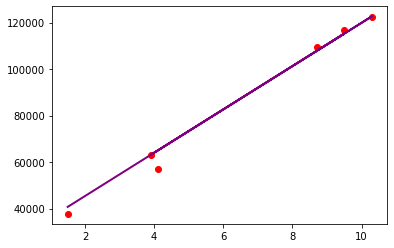

In [80]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,y_pred,color='purple',lw=2)
plt.show()

### Задание 1.3.1

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
url='https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'
df=pd.read_csv(url)
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [102]:
print(df.shape)
df.describe()

(48, 5)


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [104]:
x=df[['Average_income','Population_Driver_licence(%)','Petrol_Consumption']]
y=df['Petrol_tax']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [105]:
coef_df=pd.DataFrame(regressor.coef_,x.columns,columns=['Коэффициент'])
coef_df

,Коэффициент
Average_income,-0.000282
Population_Driver_licence(%),4.513605
Petrol_Consumption,-0.005763


In [106]:
y_pred=regressor.predict(x_test)
df1=pd.DataFrame({'Actual':y_test,'Preddicted':y_pred})
df1

,Actual,Preddicted
29,9.0,7.745885
4,8.0,8.466001
26,8.0,7.789398
30,7.0,7.634500
32,8.0,8.033229
37,7.0,7.102528
34,8.0,8.010238
40,7.0,7.801928
7,8.0,7.973379
10,8.0,7.425299


In [107]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error: 0.3222702495042146


### Задание 1.3.2

In [3]:
import numpy as np
x=[0.0,0.2,0.4,0.6,0.8,1.0]
y=[3.0,6.0,3.0,6.0,4.0,3.0]
new_y=np.array(y)
new_x=np.array(x)
A=np.vstack([new_x,np.ones(len(new_x))]).T
A

array([[0. , 1. ],
       [0.2, 1. ],
       [0.4, 1. ],
       [0.6, 1. ],
       [0.8, 1. ],
       [1. , 1. ]])

In [5]:
m,c= np.linalg.lstsq(A,new_y,rcond=None)[0]
print(m,c)

-1.2857142857142865 8.666666666666668


In [2]:
import numpy as np
x=[0.0,0.2,0.4,0.6,0.8,1.0]
y=[6.0,3.0,2.0,6.0,2.0,5.0]
new_y=np.array(y)
new_x=np.array(x)
A=np.vstack([new_x,np.ones(len(new_x))]).T
A

array([[0. , 1. ],
       [0.2, 1. ],
       [0.4, 1. ],
       [0.6, 1. ],
       [0.8, 1. ],
       [1. , 1. ]])

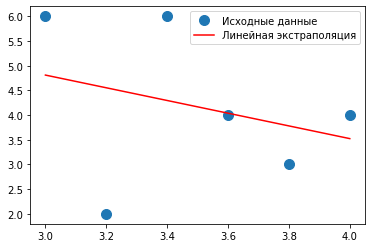

In [6]:
import matplotlib.pyplot as plt
plt.plot(new_x,new_y,'o', label='Исходные данные', markersize=10)
plt.plot(new_x,m*new_x+c,'r',label='Линейная экстраполяция')
plt.legend()
plt.show()

[3.  3.2 3.4 3.6 3.8 4. ]
[6. 2. 6. 4. 3. 4.]
-0.0023516 0.19277 -0.68789


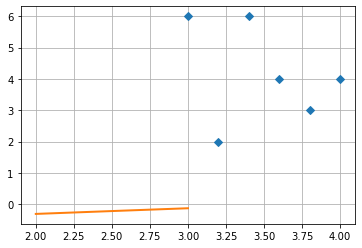

In [7]:
from numpy import *
from numpy.random import *
print(new_x)
print(new_y)
m=vstack((new_x**2,new_x,ones(6))).T
s=np.linalg.lstsq(m,new_y,rcond=None)[0]
s=[-0.0023516,0.19277,-0.68789]
x_prec=linspace(2,3,11)
plt.plot(new_x,new_y,'D')
plt.plot(x_prec,s[0]*x_prec**2+s[1]*x_prec+s[2],'-',lw=2)
plt.grid()
print(s[0],s[1],s[2])
plt.savefig('параболанов.png')